In [1]:
import torch
torch.cuda.empty_cache() 

In [2]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image

In [3]:
import pandas as pd
import pyproj

In [4]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
from pathlib import Path

In [6]:
import joblib

In [7]:
from mt_function_yl import *

In [8]:
import seaborn as sn

#### Load in Dataframes

In [9]:
# Image entropy
iea = pd.read_csv('/home/yelhe/script/mt/output/accident_image_entropy.csv')
iep = pd.read_csv('/home/yelhe/script/mt/output/pseudo_image_entropy.csv')

# Mask entropy of whole scene
dfmwa = pd.read_csv('/home/yelhe/script/mt/output/accident_predmaskgroup_entropy.csv')
dfmwp = pd.read_csv('/home/yelhe/script/mt/output/pseudo_predmaskgroup_entropy.csv')
# Mask entropy of ground scene
dfmga = pd.read_csv('/home/yelhe/script/mt/output/accident_predmaskgroup_gi_entropy_new.csv')
dfmgp = pd.read_csv('/home/yelhe/script/mt/output/pseudo_predmaskgroup_gi_entropy_new.csv')

In [10]:
# Image entropy
iea['Nr'] = iea['Nr'].values.astype(str)
iea['id'] = iea['id'].values.astype(str)
iea.rename(columns = {'entropy':'ie'}, inplace = True)

In [11]:
iep['Nr'] = iep['Nr'].values.astype(str)
iep['Nr'] = iep['Nr'].str.zfill(5)
iep['id'] = iep['id'].values.astype(str)
iep['id'] = iep['id'].str.zfill(4)
iep.rename(columns = {'entropy':'ie'}, inplace = True)

In [12]:
# Mask entropy of whole scene
mwa = dfmwa.drop(['p', 'count', 'sum', 'percentage'], axis = 1)
mwa = mwa.drop_duplicates()
mwa['id'] = mwa['id'].values.astype(str)
mwa.rename(columns = {'entropy':'mew', 'id_dir':'Nr'}, inplace = True)

In [13]:
# Mask entropy of ground scene
mga = dfmga.drop(['p', 'count', 'sum', 'percentage'], axis = 1)
mga = mga.drop_duplicates()
mga['id'] = mga['id'].values.astype(str)
mga.rename(columns = {'entropy':'meg', 'id_dir':'Nr'}, inplace = True)

In [14]:
# Pseudo
mwp = dfmwp.drop(['p', 'count', 'sum', 'percentage'], axis = 1)
mwp = mwp.drop_duplicates()
mwp.rename(columns = {'entropy':'mew', 'id_dir':'Nr'}, inplace = True)
mwp['Nr'] = mwp['Nr'].values.astype(str)
mwp['Nr'] = mwp['Nr'].str.zfill(5)
mwp['id'] = mwp['id'].values.astype(str)
mwp['id'] = mwp['id'].str.zfill(4)

In [15]:
mgp = dfmgp.drop(['p', 'count', 'sum', 'percentage'], axis = 1)
mgp = mgp.drop_duplicates()
mgp.rename(columns = {'entropy':'meg', 'id_dir':'Nr'}, inplace = True)
mgp['Nr'] = mgp['Nr'].values.astype(str)
mgp['Nr'] = mgp['Nr'].str.zfill(5)
mgp['id'] = mgp['id'].values.astype(str)
mgp['id'] = mgp['id'].str.zfill(4)

In [16]:
df_me = pd.merge(mwa, mga, on = ['id', 'dir', 'Nr'])

In [17]:
df_me_p = pd.merge(mwp, mgp, on = ['id', 'dir', 'Nr'])
df_en_p = pd.merge(df_me_p, iep, on = ['id', 'dir', 'Nr'])

In [18]:
df_me['Nr'] = df_me['Nr'].values.astype(str)
df_me['id'] = df_me['id'].values.astype(str)
df_me['dir'] = df_me['dir'].values.astype(str)
iea['Nr'] = iea['Nr'].values.astype(str)
iea['id'] = iea['id'].values.astype(str)
iea['dir'] = iea['dir'].values.astype(str)

In [19]:
df_en_a = pd.merge(df_me, iea, on = ['id', 'dir', 'Nr'])

In [20]:
df_en_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3160 entries, 0 to 3159
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      3160 non-null   object 
 1   dir     3160 non-null   int64  
 2   Nr      3160 non-null   object 
 3   mew     3160 non-null   float64
 4   meg     3160 non-null   float64
 5   ie      3160 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 148.3+ KB


In [21]:
# Entropy variables accident
eva = df_en_a[['mew', 'meg', 'ie']]

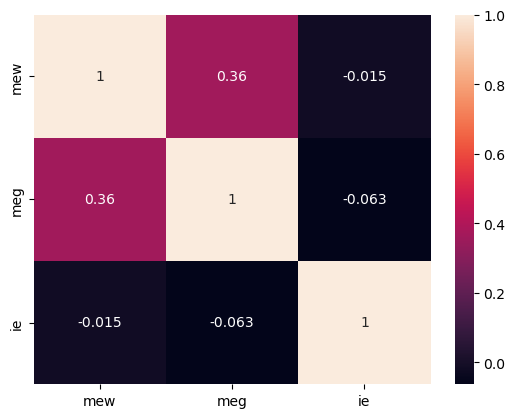

In [22]:
corr_matrix_a = eva.corr()
# sn.set(font_scale = 0.8)
sn.heatmap(corr_matrix_a, annot = True)
# plt.savefig('fig_corrmat_low_u1.png')
plt.show()

In [25]:
df_en_a.to_csv('/home/yelhe/script/mt/output/accident_entropy_sum_new.csv', index = False)
df_en_p.to_csv('/home/yelhe/script/mt/output/pseudo_entropy_sum_new.csv', index = False)

In [23]:
# Entropy variables accident
evp = df_en_p[['mew', 'meg', 'ie']]

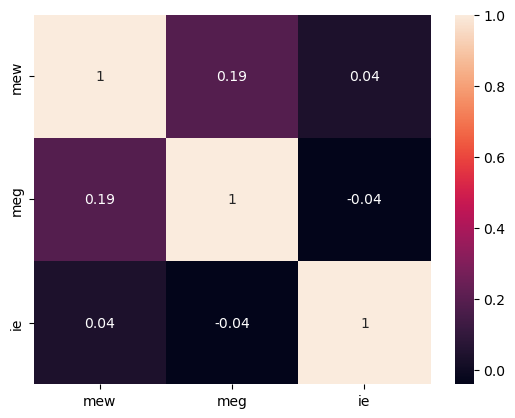

In [24]:
corr_matrix_p = evp.corr()
# sn.set(font_scale = 0.8)
sn.heatmap(corr_matrix_p, annot = True)
# plt.savefig('fig_corrmat_low_u1.png')
plt.show()